In [4]:
import pandas as pd
import numpy as np
cardata = pd.read_csv('ebay_car_scrapped_dataset_cleaned_initial.csv')
cardata['Year'] = cardata['Year'].apply(str)

In [5]:
cardata['price'] = cardata['Car Price Original']

AttributeError: 'FacetGrid' object has no attribute 'set_xticks'

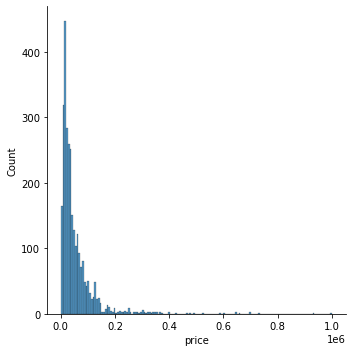

In [8]:
import seaborn as sns
ax = sns.displot(cardata['price'])
ax.set_xticks(np.arange(0,80000))


In [3]:
bins = [0, 20000, 50000,999999]
labels = ['1', '2', '3']
cardata['price'] = pd.cut(x = cardata['price'], bins = bins, labels = labels, 
                          include_lowest = True)
traindata = pd.get_dummies(cardata.drop(['Year','Car Price','Report Car Name','VIN',
                                         'Make','price','Car Price Original'],axis=1))

In [7]:
cardata['price'].value_counts()

2    1049
3     974
1     923
Name: price, dtype: int64

In [10]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2946 entries, 0 to 2945
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Year                        2946 non-null   object  
 1   Mileage                     2946 non-null   int64   
 2   Fuel Type                   2946 non-null   object  
 3   Vehicle Title               2946 non-null   object  
 4   Condition                   2946 non-null   object  
 5   Report Car Name             2946 non-null   object  
 6   Vehicle Age                 2946 non-null   int64   
 7   Calculated Owners           2946 non-null   int64   
 8   State Title Brand Reported  2946 non-null   object  
 9   Accidents Reported          2946 non-null   int64   
 10  Odometer                    2946 non-null   object  
 11  Open Recall                 2946 non-null   object  
 12  Number of Cylinders         2946 non-null   object  
 13  Engine            

In [8]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

traindata = pd.get_dummies(cardata.drop(['Year','Car Price','Report Car Name','VIN','Make','price','Car Price Original'],axis=1))
#traindata = pd.get_dummies(cardata.drop(['price'],axis=1))
testdata = cardata['price']
xtrain,xtest,ytrain,ytest = train_test_split(traindata,testdata,test_size=0.2,random_state=101)

rd = RandomForestClassifier(random_state=101)
rd.fit(xtrain,ytrain)
pred = rd.predict(xtest)
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           1       0.80      0.79      0.79       180
           2       0.72      0.71      0.72       220
           3       0.83      0.84      0.84       190

    accuracy                           0.78       590
   macro avg       0.78      0.78      0.78       590
weighted avg       0.78      0.78      0.78       590



In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

xtrain,xtest,ytrain,ytest = train_test_split(traindata,testdata,
                                             test_size=0.2,random_state=101)

rd = RandomForestClassifier(random_state=101)
rd.fit(xtrain,ytrain)
pred = rd.predict(xtest)
print(classification_report(ytest,pred))

In [9]:
#FEATURE SELECTION BASED ON RD FEATURE IMPORTANCES

from sklearn.feature_selection import SelectFromModel
from numpy import sort

thresholds = sort(rd.feature_importances_)
max_accuracy = 0
max_threshold = 0
features = 0
report = ""
feature_names = np.empty([1,1])
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(rd, threshold=thresh, prefit=True)
    select_X_train = selection.transform(xtrain)
    # train model
    selection_model = RandomForestClassifier(random_state=180)
    selection_model.fit(select_X_train, ytrain)
    # eval model
    select_X_test = selection.transform(xtest)
    y_pred = selection_model.predict(select_X_test)
    if(classification_report(ytest,y_pred,output_dict=True)['accuracy']>max_accuracy):
        max_accuracy = classification_report(ytest,y_pred,output_dict=True)['accuracy']
        max_threshold = thresh
        features = select_X_train.shape[1]
        feature_names =  selection.get_support()
        report = classification_report(ytest,y_pred)
print(max_accuracy)
print(max_threshold)
print(features)
print(report)
print(feature_names)

/Users/harita_addanki/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/harita_addanki/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/harita_addanki/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/harita_addanki/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/harita_addanki/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/harita_addanki/opt/anaconda3/lib/python3.9/site-

/Users/harita_addanki/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/harita_addanki/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/harita_addanki/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/harita_addanki/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/harita_addanki/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/harita_addanki/opt/anaconda3/lib/python3.9/site-

/Users/harita_addanki/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/harita_addanki/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/harita_addanki/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/harita_addanki/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/harita_addanki/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/harita_addanki/opt/anaconda3/lib/python3.9/site-

0.7813559322033898
0.0020268286302606345
47
              precision    recall  f1-score   support

           1       0.81      0.79      0.80       180
           2       0.72      0.72      0.72       220
           3       0.82      0.84      0.83       190

    accuracy                           0.78       590
   macro avg       0.79      0.78      0.78       590
weighted avg       0.78      0.78      0.78       590

[ True  True  True  True False  True  True  True  True  True  True False
 False  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True False  True False False False  True  True  True
  True  True  True  True False False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]


/Users/harita_addanki/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [10]:
#parameter tuning OF RF

from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid,
                               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(xtrain,ytrain)
print(classification_report(ytest,rf_random.predict(xtest)))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   4.1s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   2.6s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=   3.7s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800

In [11]:
numerical = cardata._get_numeric_data().columns

In [12]:
categorical_columns = list(set(list(cardata.columns)) - set(list(numerical)))

In [13]:
feature_names = list(xtrain.columns[feature_names])

In [14]:
feature_names = set([i.split('_')[0] for i in feature_names])

In [12]:
feature_names

{'Accidents Reported',
 'Body Type',
 'Calculated Owners',
 'Class',
 'Condition',
 'Engine',
 'Fuel Type',
 'Mileage',
 'Number of Cylinders',
 'Odometer',
 'Open Recall',
 'Size',
 'State Title Brand Reported',
 'Vehicle Age',
 'Vehicle Title'}

In [15]:
cardata.drop(['Car Price','Report Car Name','VIN','Make','price','Car Price Original'],axis=1).columns

Index(['Year', 'Mileage', 'Fuel Type', 'Vehicle Title', 'Condition',
       'Vehicle Age', 'Calculated Owners', 'State Title Brand Reported',
       'Accidents Reported', 'Odometer', 'Open Recall', 'Number of Cylinders',
       'Engine', 'Body Type', 'Size', 'Class'],
      dtype='object')

In [16]:
traindata.columns

Index(['Mileage', 'Vehicle Age', 'Calculated Owners', 'Accidents Reported',
       'Fuel Type_5.0L V8', 'Fuel Type_Diesel', 'Fuel Type_Electric',
       'Fuel Type_Flexible', 'Fuel Type_Gasoline', 'Fuel Type_Hybrid-Electric',
       'Vehicle Title_Clean', 'Vehicle Title_Flood, Water Damage',
       'Vehicle Title_Lemon & Manufacturer Buyback',
       'Vehicle Title_Rebuilt, Rebuildable & Reconstructed',
       'Vehicle Title_Salvage', 'Condition_Certified pre-owned',
       'Condition_New', 'Condition_Used', 'State Title Brand Reported_No',
       'State Title Brand Reported_Yes', 'Odometer_No Problem',
       'Odometer_Problem Reported', 'Open Recall_No', 'Open Recall_Yes',
       'Number of Cylinders_eight', 'Number of Cylinders_five',
       'Number of Cylinders_four', 'Number of Cylinders_one',
       'Number of Cylinders_seven', 'Number of Cylinders_six',
       'Number of Cylinders_three', 'Number of Cylinders_twelve',
       'Number of Cylinders_two', 'Number of Cylinders_zero',

In [17]:
train_data = traindata.copy(deep=True)
train_data.columns

Index(['Mileage', 'Vehicle Age', 'Calculated Owners', 'Accidents Reported',
       'Fuel Type_5.0L V8', 'Fuel Type_Diesel', 'Fuel Type_Electric',
       'Fuel Type_Flexible', 'Fuel Type_Gasoline', 'Fuel Type_Hybrid-Electric',
       'Vehicle Title_Clean', 'Vehicle Title_Flood, Water Damage',
       'Vehicle Title_Lemon & Manufacturer Buyback',
       'Vehicle Title_Rebuilt, Rebuildable & Reconstructed',
       'Vehicle Title_Salvage', 'Condition_Certified pre-owned',
       'Condition_New', 'Condition_Used', 'State Title Brand Reported_No',
       'State Title Brand Reported_Yes', 'Odometer_No Problem',
       'Odometer_Problem Reported', 'Open Recall_No', 'Open Recall_Yes',
       'Number of Cylinders_eight', 'Number of Cylinders_five',
       'Number of Cylinders_four', 'Number of Cylinders_one',
       'Number of Cylinders_seven', 'Number of Cylinders_six',
       'Number of Cylinders_three', 'Number of Cylinders_twelve',
       'Number of Cylinders_two', 'Number of Cylinders_zero',

In [18]:
for i in list(train_data.columns):
    feature = i.split('_')[0]
    if feature not in feature_names:
        l.append(feature)
        train_data.drop(i,axis=1,inplace=True)
        

In [58]:
x_train,x_test,y_train,y_test = train_test_split(train_data,testdata,test_size=0.2,random_state=101)
rd = RandomForestClassifier(random_state=101)
rd.fit(x_train,y_train)
pred = rd.predict(x_test)
print('\t\tRandom Forest Classifier')
print('\n')
print(classification_report(y_test,pred))

		Random Forest Classifier


              precision    recall  f1-score   support

           1       0.80      0.79      0.79       180
           2       0.72      0.71      0.72       220
           3       0.83      0.84      0.84       190

    accuracy                           0.78       590
   macro avg       0.78      0.78      0.78       590
weighted avg       0.78      0.78      0.78       590



In [66]:
#OPTIMIZED SVC WITH PARAMETER TUNING
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(x_train,y_train)
print('\n')
print('\t\tSupport Vector Machine Classifier')
print('\n')
print(classification_report(y_test,grid.predict(x_test)))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.352 total time=   0.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.350 total time=   0.4s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.352 total time=   0.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.352 total time=   0.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.352 total time=   0.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.352 total time=   0.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.350 total time=   0.4s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.352 total time=   0.4s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.352 total time=   0.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.352 total time=   0.4s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.364 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.478 total time=   0.4s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.482 total time=   0.4s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.482 total time=   0.4s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.488 total time=   0.4s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.534 total time=   0.4s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.510 total time=   0.4s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.524 total time=   0.4s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.507 total time=   0.4s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.548 total time=   0.4s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.517 total time=   0.4s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.541 total time=   0.4s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.548 total time=   0.4s
[CV 4/5] END ....C=1000, gam

In [68]:
#OPTIMIZED SVC WITH PARAMETER TUNING
from sklearn.svm import SVC
grid = SVC()
grid.fit(x_train,y_train)
print('\n')
print('\t\tSupport Vector Machine Classifier')
print('\n')
print(classification_report(y_test,grid.predict(x_test)))



		Support Vector Machine Classifier


              precision    recall  f1-score   support

           1       0.62      0.64      0.63       180
           2       0.50      0.48      0.49       220
           3       0.63      0.64      0.63       190

    accuracy                           0.58       590
   macro avg       0.58      0.59      0.58       590
weighted avg       0.58      0.58      0.58       590



In [69]:
import numpy as np
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,grid.predict_proba(x_test),multi_class='ovr'))

AttributeError: predict_proba is not available when  probability=False

In [57]:
#PARAMETER TUNING FOR NB
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(x_train, y_train)
print('\n')
print('\t\tNaive Bayes Classifier')
print('\n')
print(classification_report(y_test,nbModel_grid.predict(x_test)))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


		Naive Bayes Classifier


              precision    recall  f1-score   support

           1       0.64      0.57      0.61       180
           2       0.51      0.34      0.41       220
           3       0.56      0.83      0.67       190

    accuracy                           0.57       590
   macro avg       0.57      0.58      0.56       590
weighted avg       0.56      0.57      0.55       590



In [55]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=101, multi_class='multinomial', penalty='none', solver='newton-cg')
model = model.fit(x_train, y_train)
preds = model.predict(x_test)
print('\t\tLogistic Regression')
print('\n')
print(classification_report(y_test,preds))

/Users/harita_addanki/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/harita_addanki/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


		Logistic Regression


              precision    recall  f1-score   support

           1       0.79      0.76      0.77       180
           2       0.65      0.68      0.67       220
           3       0.78      0.77      0.78       190

    accuracy                           0.73       590
   macro avg       0.74      0.74      0.74       590
weighted avg       0.74      0.73      0.73       590



/Users/harita_addanki/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [43]:
import numpy as np
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,rd.predict_proba(x_test),multi_class='ovr'))

0.9128686357614471


In [41]:
import numpy as np
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,nbModel_grid.predict_proba(x_test),multi_class='ovr'))

0.7759089863582803


In [42]:
import numpy as np
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,model.predict_proba(x_test),multi_class='ovr'))

0.8833873596142531


In [20]:
import scikitplot as skplt
# Deriving Class probabilities
predicted_probabilities = rd.predict_proba(x_test)
# Creating the plot
skplt.metrics.plot_cumulative_gain(y_test, predicted_probabilities)

ValueError: Cannot calculate Cumulative Gains for data with 3 category/ies

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   4.1s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=   3.2s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=   3.7s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   2.7s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.6s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   2.3s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=   4.6s
[CV] END bootstrap=False, max_depth

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   4.1s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=   3.2s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=   3.7s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   2.6s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.6s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.5s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=   4.6s
[CV] END bootstrap=False, max_depth=

[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   2.9s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   2.8s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   2.6s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   2.6s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=   4.3s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   2.3s
[CV] END bootstrap=False, max_depth=90, 

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   4.1s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=   3.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   2.6s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   2.5s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=   4.3s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=   4.6s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   4.9s
[CV] END bootstrap=True, max_dept

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

d = pd.DataFrame({'Model':['Naive Bayes','Logistic Regression','Random Forest']*2,'Accuracy':[54,60,60,57,73,78],'Type':['Base Model','Base Model','Base Model','Optimized Model','Optimized Model','Optimized Model']})


In [37]:
d

,Model,Accuracy,Type
0,Naive Bayes,54,Base Model
1,Logistic Regression,60,Base Model
2,Random Forest,60,Base Model
3,Naive Bayes,57,Optimized Model
4,Logistic Regression,73,Optimized Model
5,Random Forest,78,Optimized Model


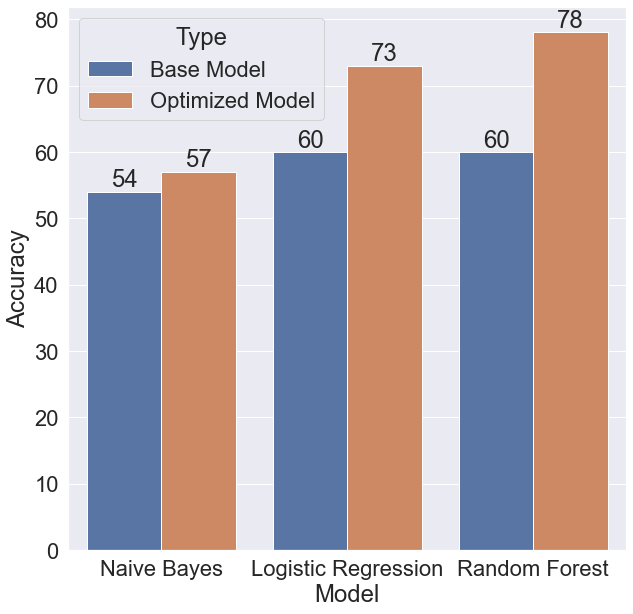

In [79]:
plt.figure(figsize=(10,10))
sns.set(font_scale=2)
ax = sns.barplot(data = d,x='Model',y='Accuracy',hue='Type')
for i in ax.containers:
    ax.bar_label(i,)

In [45]:
k = pd.DataFrame({'Model':['Naive Bayes','Logistic Regression','Random Forest'],'ROC_Score':[0.77,0.88,0.91]})
k

,Model,ROC_Score
0,Naive Bayes,0.77
1,Logistic Regression,0.88
2,Random Forest,0.91


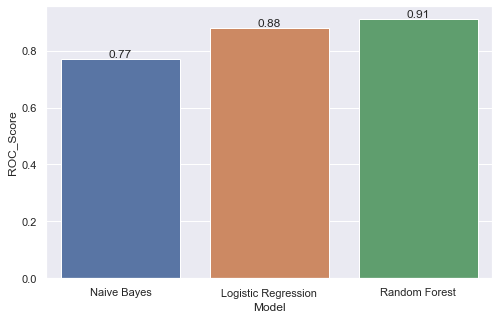

In [72]:
sns.set(font_scale=1)
plt.figure(figsize=(8,5))
ax = sns.barplot(data=k,x='Model',y='ROC_Score')
for i in ax.containers:
    ax.bar_label(i,)